# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Aleisya Zahari Salam
- **Email:** aleisyazahari19@gmail.com
- **ID Dicoding:** aleisya01

## Menentukan Pertanyaan Bisnis

- Kategori produk apa saja yang paling banyak terjual dan paling sedikit terjual?
- Bagaimana data pembelian order setiap bulan secara menyeluruh?
- Apakah metode pembayaran yang paling banyak digunakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 88.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

import datetime as dt

## Data Wrangling

In [3]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

### Gathering Data

#### load data

In [4]:
sellers_df = pd.read_csv(r"data/sellers_dataset.csv")
sellers_df = pd.read_csv(r"data/sellers_dataset.csv")
products_df = pd.read_csv(r"data/products_dataset.csv")
category_translation_df = pd.read_csv(r"data/product_category_name_translation.csv")
orders_df = pd.read_csv(r"data/orders_dataset.csv")
reviews_df = pd.read_csv(r"data/order_reviews_dataset.csv")
payments_df = pd.read_csv(r"data/order_payments_dataset.csv")
order_items_df = pd.read_csv(r"data/order_items_dataset.csv")
geolocation_df = pd.read_csv(r"data/geolocation_dataset.csv")
customers_df = pd.read_csv(r"data/customers_dataset.csv")


In [5]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
products_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
category_translation_df.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
reviews_df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
payments_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
order_items_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
geolocation_df.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [14]:
print("sellers_df columns:", sellers_df.columns.tolist())
print("products_df columns:", products_df.columns.tolist())
print("category_translation_df columns:", category_translation_df.columns.tolist())
print("orders_df columns:", orders_df.columns.tolist())
print("reviews_df columns:", reviews_df.columns.tolist())
print("payments_df columns:", payments_df.columns.tolist())
print("order_items_df columns:", order_items_df.columns.tolist())
print("geolocation_df columns:", geolocation_df.columns.tolist())
print("customers_df columns:", customers_df.columns.tolist())

sellers_df columns: ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']
products_df columns: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
category_translation_df columns: ['product_category_name', 'product_category_name_english']
orders_df columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
reviews_df columns: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
payments_df columns: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
order_items_df columns: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 

### Assessing Data

In [15]:
def assess_df(df, name):
    print(f"\n{'='*30} {name} {'='*30}")

    print("\n📄 Struktur Dataset:")
    df.info()  # Tampilkan informasi lengkap (tanpa verbose=False)

    # Menampilkan jenis kolom berdasarkan tipe data
    print("\n🔎 Jenis Kolom:")
    numerics = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categoricals = df.select_dtypes(include=['object', 'category']).columns.tolist()
    datetimes = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

    print(f"- 📐 Kolom Numerik     : {numerics}")
    print(f"- 🏷️  Kolom Kategorikal : {categoricals}")
    print(f"- ⏰ Kolom Datetime     : {datetimes}")

    print("\n❓ Missing Values:")
    display(df.isna().sum())

    print("\n🔁 Jumlah Duplikat:")
    print(df.duplicated().sum())

    print("\n📊 Descriptive Statistics:")
    display(df.describe(include='all'))


##### sellers_df

In [16]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [17]:
assess_df(sellers_df, "sellers_df")


============================== sellers_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : ['seller_zip_code_prefix']
- 🏷️  Kolom Kategorikal : ['seller_id', 'seller_city', 'seller_state']
- ⏰ Kolom Datetime     : []

❓ Missing Values:


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0



🔁 Jumlah Duplikat:
0

📊 Descriptive Statistics:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


sellers_df tidak memiliki nilai null, duplikat, dan value-value yang dimiliki masih dalam batas wajar

##### products_df

In [18]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [19]:
assess_df(products_df, "products_df")


============================== products_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', '

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2



🔁 Jumlah Duplikat:
0

📊 Descriptive Statistics:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [20]:
products_df[products_df.isna().any(axis=1)]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


- terdapat kolom null yaitu :
  1. product_category_name	610
  2. product_name_lenght	610
  3. product_description_lenght	610
  4. product_photos_qty 610
- namun karena kolom lain seperti `product_weight_g`,	`product_length_cm`, `product_height_cm`, dan	`product_width_cm` tetap ada value, kolom null akan tetap dipertahankan untuk analisis lanjut
- duplikat tidak ditemukan, dan value yang dimiliki masih dalam batas normal

##### category_translation_df

In [21]:
assess_df(category_translation_df, "category_translation_df")


============================== category_translation_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : []
- 🏷️  Kolom Kategorikal : ['product_category_name', 'product_category_name_english']
- ⏰ Kolom Datetime     : []

❓ Missing Values:


,0
product_category_name,0
product_category_name_english,0



🔁 Jumlah Duplikat:
0

📊 Descriptive Statistics:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [22]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


tidak ada perbaikan untuk `category_translation_df`

##### orders_df

In [23]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
assess_df(orders_df, "orders_df")


============================== orders_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : []
- 🏷️  Kolom Kategorikal : ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0



🔁 Jumlah Duplikat:
0

📊 Descriptive Statistics:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [25]:
orders_df[orders_df.isna().any(axis=1)]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [26]:
orders_df['order_status'].unique()


array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

- dalam `orders_df` untuk kolom yang terdapat timestamp masih dalam tipe object, selanjutnya akan diganti
- terdapat missing value:
 1. order_approved_at	160
 2. order_delivered_carrier_date	1783
 3. order_delivered_customer_date	2965
 setelah dilakukan pengecekkan nilai Nan ini bukan value sembarangan karena tidak ditemukan, melainkan hal ini terjadi karena alasan, misal 'canceled' → Tidak disetujui dan tidak dikirim
 maka dari itu akan dibiarkan saja dengan pengingat akan dilakukan filter saat melakukan analisis lebih lanjut

- selanjutnya akan dilakukan pengelompokkan:
 - valid_status = ['delivered', 'invoiced', 'shipped', 'processing', 'approved']
 - invalid_status = ['unavailable', 'canceled', 'created']


##### reviews_df

In [27]:
assess_df(reviews_df, "reviews_df")


============================== reviews_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : ['review_score']
- 🏷️  Kolom Kategorikal : ['review_id', 'order_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
- ⏰ Kolom Datetime     : []

❓ Missing Values:


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0



🔁 Jumlah Duplikat:
0

📊 Descriptive Statistics:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [28]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


terdapat nilai nan
- review_comment_title	87656
- review_comment_message	58247
mungkin saja nilai nan ini karena beberapa alasan seperti pesanan tidak invalid, tindak lanjutnya untuk digunakan filter

##### payments_df

In [29]:
assess_df(payments_df, "payments_df")


============================== payments_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : ['payment_sequential', 'payment_installments', 'payment_value']
- 🏷️  Kolom Kategorikal : ['order_id', 'payment_type']
- ⏰ Kolom Datetime     : []

❓ Missing Values:


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0



🔁 Jumlah Duplikat:
0

📊 Descriptive Statistics:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [30]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


tidak ada nan maupun value yang tidak normal

##### order_items_df

In [31]:
assess_df(order_items_df, "order_items_df")


============================== order_items_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : ['order_item_id', 'price', 'freight_value']
- 🏷️  Kolom Kategorikal : ['order_id', 'product_id', 'seller_id', 'shipping_limit_date']
- ⏰ Kolom Datetime     : []

❓ Missing Values:


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0



🔁 Jumlah Duplikat:
0

📊 Descriptive Statistics:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [32]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


`order_items_df` tidak ada nan maupun value yang tidak normal

##### geolocation_df

In [33]:
assess_df(geolocation_df, "geolocation_df")


============================== geolocation_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
- 🏷️  Kolom Kategorikal : ['geolocation_city', 'geolocation_state']
- ⏰ Kolom Datetime     : []

❓ Missing Values:


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0



🔁 Jumlah Duplikat:
261831

📊 Descriptive Statistics:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


tidak ada nan maupun value yang tidak normal, tetapi ada banyak duplikat 261831

##### customers_df

In [34]:
assess_df(customers_df, "customers_df")


============================== customers_df ==============================

📄 Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

🔎 Jenis Kolom:
- 📐 Kolom Numerik     : ['customer_zip_code_prefix']
- 🏷️  Kolom Kategorikal : ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']
- ⏰ Kolom Datetime     : []

❓ Missing Values:


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0



🔁 Jumlah Duplikat:
0

📊 Descriptive Statistics:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


tidak ada nan maupun value yang tidak normal

**Insight:**

- `sellers_df`,  `payments_df`, `order_items_df`, `order_items_df`, `category_translation_df`, `geolocation_df`, dan `customers_df` tidak memiliki nilai null, duplikat, dan value-value yang dimiliki masih dalam batas wajar

- `products_df` terdapat kolom null yaitu :
  1. product_category_name  610
  2. product_name_lenght  610
  3. product_description_lenght 610
  4. product_photos_qty 610
  
  namun karena kolom lain seperti `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` tetap ada value, kolom null akan tetap dipertahankan untuk analisis lanjut
  
  duplikat tidak ditemukan, dan value yang dimiliki masih dalam batas normal

- dalam `orders_df` untuk kolom yang terdapat timestamp masih dalam tipe object, selanjutnya akan diganti
  
  terdapat missing value:
 1. order_approved_at 160
 2. order_delivered_carrier_date  1783
 3. order_delivered_customer_date 2965

  setelah dilakukan pengecekkan nilai Nan ini bukan value sembarangan karena tidak ditemukan, melainkan hal ini terjadi karena alasan, misal 'canceled' → Tidak disetujui dan tidak dikirim
   maka dari itu akan dibiarkan saja dengan pengingat akan dilakukan filter saat melakukan analisis lebih lanjut

 - selanjutnya akan dilakukan pengelompokkan:
 - valid_status = ['delivered', 'invoiced', 'shipped', 'processing', 'approved']
 - invalid_status = ['unavailable', 'canceled', 'created']



- `reviews_df`terdapat nilai nan
  - review_comment_title  87656
  - review_comment_message  58247
  
  mungkin saja nilai nan ini karena beberapa alasan seperti pesanan tidak invalid, tindak lanjutnya untuk digunakan filter




### Cleaning Data

#### timestamp dalam `orders_df`, `reviews_df`, dan `order_items_df`

In [35]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [36]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    orders_df[col]=pd.to_datetime(orders_df[col])

In [37]:
review_col = ['review_creation_date',
              'review_answer_timestamp']
for col in review_col:
    reviews_df[col]=pd.to_datetime(reviews_df[col])

In [38]:
order_items_df['shipping_limit_date']=pd.to_datetime(order_items_df['shipping_limit_date'])

#### hapus duplikat `geolocation_df`

In [39]:
geolocation_df.duplicated().sum()

np.int64(261831)

In [40]:
geolocation_df.drop_duplicates(inplace=True)

In [41]:
geolocation_df.duplicated().sum()

np.int64(0)

#### assesment reviews_df

In [42]:
merged_reviews = reviews_df.merge(orders_df[['order_id', 'order_status']], on='order_id', how='left')

# Cek distribusi status pesanan untuk review yang tidak ada komentarnya
merged_reviews[merged_reviews['review_comment_message'].isna()]['order_status'].value_counts(normalize=True)


,proportion
order_status,
delivered,0.983089
shipped,0.007022
canceled,0.003485
unavailable,0.003125
invoiced,0.001700
processing,0.001528
approved,0.000034
created,0.000017


sebagian besar Nan merupakan pesanan yang sudah dikirim, karena nan mencapai 88% data maka tidak dihapus, melainkan ditambahkan kolom 'has_comment_message' dan 'has_comment_title'

In [43]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [44]:
reviews_df['has_comment_message'] = reviews_df['review_comment_message'].notna().map({True: 'Yes', False: 'No'})
reviews_df['has_comment_title'] = reviews_df['review_comment_title'].notna().map({True: 'Yes', False: 'No'})


In [45]:
reviews_df["review_comment_title"].fillna("No Title", inplace=True)
reviews_df["review_comment_message"].fillna("No Message", inplace=True)

<ipython-input-45-2b1a2f8b1358>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df["review_comment_title"].fillna("No Title", inplace=True)
<ipython-input-45-2b1a2f8b1358>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [46]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,has_comment_message,has_comment_title
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59,No,No
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10,2018-03-11 03:05:13,No,No
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17,2018-02-18 14:36:24,No,No
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,Yes,No
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,Yes,No


#### products_df

In [47]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [48]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

In [49]:
print("sellers_df columns:", sellers_df.columns.tolist())
print("products_df columns:", products_df.columns.tolist())
print("category_translation_df columns:", category_translation_df.columns.tolist())
print("orders_df columns:", orders_df.columns.tolist())
print("reviews_df columns:", reviews_df.columns.tolist())
print("payments_df columns:", payments_df.columns.tolist())
print("order_items_df columns:", order_items_df.columns.tolist())
print("geolocation_df columns:", geolocation_df.columns.tolist())
print("customers_df columns:", customers_df.columns.tolist())

sellers_df columns: ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']
products_df columns: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
category_translation_df columns: ['product_category_name', 'product_category_name_english']
orders_df columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
reviews_df columns: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'has_comment_message', 'has_comment_title']
payments_df columns: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
order_items_df columns: ['order_id', 'order_item_id', 'product_id', '

### Explore sellers_df

In [50]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [51]:
sellers_df['seller_city'].value_counts()
sellers_df['seller_state'].value_counts()

,count
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


In [52]:
sellers_df['seller_id'].nunique()

3095

**Insight:**
- state penjual terbanyak pada code SP	berjumlah 1849
- total penjual 3095

### Explore products_df

In [53]:
products_df['product_category_name'].value_counts()


,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


**Insight:**
- 5 produk kategori terbanyak yaitu :
  cama_mesa_banho	3029

  esporte_lazer	2867

  moveis_decoracao	2657
  
  beleza_saude	2444

  utilidades_domesticas	2335

### Explore payments_df

In [54]:
payments_df.info()
payments_df['payment_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [55]:
payments_df['payment_installments'].describe()


,payment_installments
count,103886.000000
mean,2.853349
std,2.687051
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,24.000000


In [56]:
payments_df['payment_value'].describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


**Insight:**
- Jenis pembayaran paling sering digunakan yaitu credit card
- Mayoritas pelanggan melakukan pembayaran tanpa cicilan atau hanya satu kali cicilan (1x bayar lunas). Hal ini terlihat dari median = 1 dan 25% hingga 50% pengguna hanya bayar 1 kali.
- Rata-rata nilai pembayaran = 154, tapi median = 100, artinya distribusi data agak miring ke kanan (positively skewed), menunjukkan adanya outlier dengan transaksi besar.
-

### Explore order_items_df

In [57]:
order_items_df.info()
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [58]:
order_items_df['order_item_id'].max()

21

In [59]:
order_items_df['freight_value'].describe()

,freight_value
count,112650.000000
mean,19.990320
std,15.806405
min,0.000000
25%,13.080000
50%,16.260000
75%,21.150000
max,409.680000


**Insight:**
- Rata-rata ongkos kirim adalah sekitar 19.990, namun terdapat perbedaan mencolok karena ongkos kirim bisa mencapai 409.680 — mungkin untuk pengiriman jauh, besar, atau ekspres.
- Sebagian besar ongkos kirim < 21.000

### Explore products_df

**Insight:**
-

### Explore products_df

**Insight:**
-

### Explore products_df

**Insight:**
-

## Visualization & Explanatory Analysis

### merge data

In [60]:
merged_df = orders_df.merge(order_items_df, on='order_id', how='inner')


In [61]:
products_full = products_df.merge(category_translation_df, on='product_category_name', how='left')
merged_df = merged_df.merge(products_full, on='product_id', how='left')


In [62]:
merged_df = merged_df.merge(sellers_df, on='seller_id', how='left')


In [63]:
# # Agregasi dulu kalau perlu
# payments_grouped = payments_df.groupby('order_id')['payment_value'].sum().reset_index()
# merged_df = merged_df.merge(payments_grouped, on='order_id', how='left')

# reviews_grouped = reviews_df.groupby('order_id')['review_score'].mean().reset_index()
# merged_df = merged_df.merge(reviews_grouped, on='order_id', how='left')


In [64]:
merged_df = merged_df.merge(customers_df, on='customer_id', how='left')


In [65]:
merged_df = merged_df.merge(payments_df, on='order_id', how='left')

In [66]:
merged_df = merged_df.merge(reviews_df, on='order_id', how='left')

In [67]:
geo_mean = geolocation_df.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()
geo_mean.columns = ['zip_code_prefix', 'lat', 'lng']


In [68]:
merged_df = merged_df.merge(
    geo_mean,
    left_on='customer_zip_code_prefix',
    right_on='zip_code_prefix',
    how='left'
)
merged_df = merged_df.rename(columns={'lat': 'customer_lat', 'lng': 'customer_lng'})
merged_df = merged_df.drop(columns='zip_code_prefix')  # opsional, untuk rapi


In [69]:
merged_df = merged_df.merge(
    geo_mean,
    left_on='seller_zip_code_prefix',
    right_on='zip_code_prefix',
    how='left'
)
merged_df = merged_df.rename(columns={'lat': 'seller_lat', 'lng': 'seller_lng'})
merged_df = merged_df.drop(columns='zip_code_prefix')  # opsional, untuk rapi


In [70]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,has_comment_message,has_comment_title,customer_lat,customer_lng,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,Yes,No,-23.577482,-46.587077,-23.680862,-46.444311
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,Yes,No,-23.577482,-46.587077,-23.680862,-46.444311
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,Yes,No,-23.577482,-46.587077,-23.680862,-46.444311
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,Yes,Yes,-12.186877,-44.540232,-19.807885,-43.980818
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,No Title,No Message,2018-08-18,2018-08-22 19:07:58,No,No,-16.745150,-48.514783,-21.363473,-48.229588


In [71]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'has_comment_message', 'has_comment_title',
  

### Pertanyaan 1: Kategori produk apa saja yang paling banyak terjual dan paling sedikit terjual?


In [72]:
product_id_counts = merged_df.groupby('product_category_name_english')['product_id'].count().reset_index()
product_id_counts = product_id_counts.sort_values(by='product_id', ascending=False)
product_id_counts = product_id_counts.rename(columns={'product_id': 'Product Count', 'product_category_name_english': 'Product Category'})
product_id_counts

,Product Category,Product Count
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


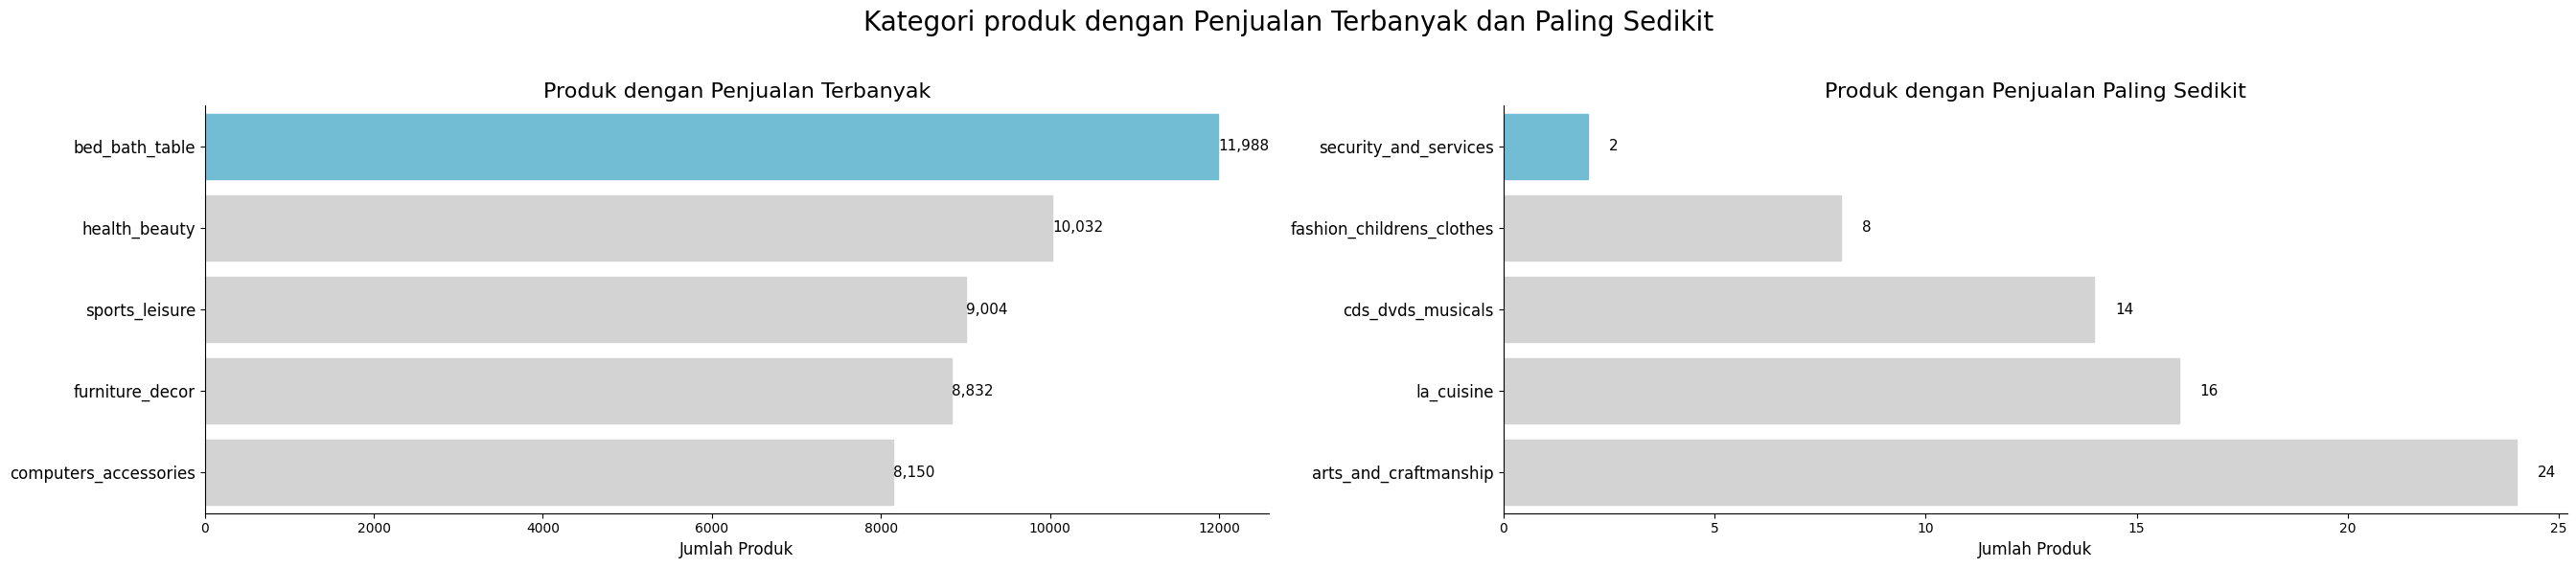

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(27, 6))

# --- Data ---
top_5 = product_id_counts.head(5)
least_5 = product_id_counts.sort_values(by="Product Count", ascending=True).head(5)

# --- Barplot kiri (terbanyak) ---
bars1 = sns.barplot(
    x="Product Count", y="Product Category",
    data=top_5,
    ax=ax[0]
)
for i, bar in enumerate(bars1.patches):
    color = "#72BCD4" if i == 0 else "#D3D3D3"
    bar.set_color(color)

    # Tambahkan label di ujung bar
    ax[0].text(
        bar.get_width() + 0.5,  # geser sedikit kanan
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():,.0f}',
        va='center', fontsize=11
    )

ax[0].set_xlabel("Jumlah Produk", fontsize=12)
ax[0].set_ylabel(None)
ax[0].set_title("Produk dengan Penjualan Terbanyak", fontsize=16)
ax[0].tick_params(axis='y', labelsize=12)

# --- Barplot kanan (paling sedikit) ---
bars2 = sns.barplot(
    x="Product Count", y="Product Category",
    data=least_5,
    ax=ax[1]
)
for i, bar in enumerate(bars2.patches):
    color = "#72BCD4" if i == 0 else "#D3D3D3"
    bar.set_color(color)

    # Tambahkan label di ujung bar
    ax[1].text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():,.0f}',
        va='center', fontsize=11
    )


ax[1].set_xlabel("Jumlah Produk", fontsize=12)
ax[1].set_ylabel(None)
ax[1].set_title("Produk dengan Penjualan Paling Sedikit", fontsize=16)
ax[1].tick_params(axis='y', labelsize=12)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

# --- Layout ---
plt.suptitle("Kategori produk dengan Penjualan Terbanyak dan Paling Sedikit", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Pertanyaan 2: Bagaimana data pembelian order setiap bulan secara menyeluruh?


In [81]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'has_comment_message', 'has_comment_title',
  

In [82]:
merged_df['order_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M').astype(str)


In [83]:
# # --- Hitung total order per bulan dari merged_df ---
monthly_orders = merged_df.groupby('order_month').size().reset_index(name='total_orders')


In [84]:
min_date = merged_df['order_purchase_timestamp'].min()
max_date = merged_df['order_purchase_timestamp'].max()

print(f"Tanggal paling awal  : {min_date}")
print(f"Tanggal paling terbaru: {max_date}")


Tanggal paling awal  : 2016-09-04 21:15:19
Tanggal paling terbaru: 2018-09-03 09:06:57


In [85]:
monthly_orders

,order_month,total_orders
0,2016-09,6
1,2016-10,385
2,2016-12,1
3,2017-01,1023
4,2017-02,2073
5,2017-03,3201
6,2017-04,2864
7,2017-05,4445
8,2017-06,3822
9,2017-07,4887


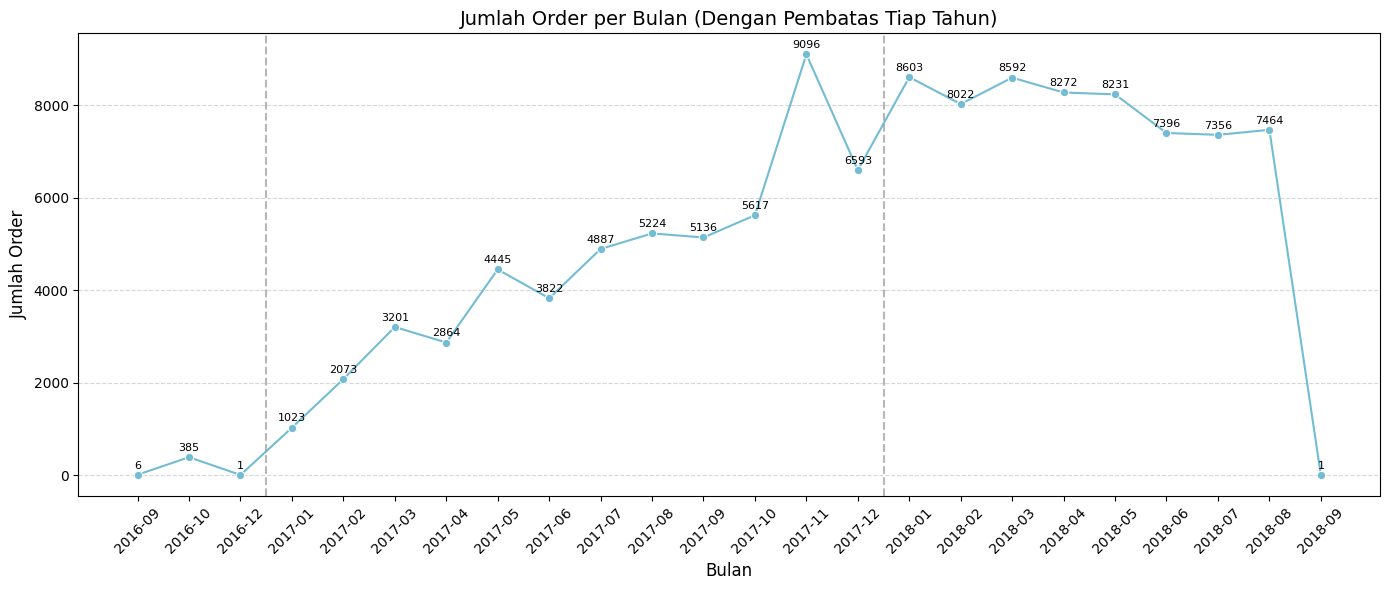

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan format string untuk sumbu x
monthly_orders['order_month'] = monthly_orders['order_month'].astype(str)

# Cari posisi index tiap awal tahun
monthly_orders = monthly_orders.sort_values('order_month')
tick_positions = monthly_orders.reset_index().reset_index()  # dua reset_index buat ngambil posisi integer
year_start_positions = (
    tick_positions
    .groupby(monthly_orders['order_month'].str[:4])
    .first()['level_0']
    .values[1:]  # skip tahun pertama, karena pembatas mulai dari tahun berikutnya
)

# --- Visualisasi ---
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_orders, x='order_month', y='total_orders', marker='o', color='#72BCD4')

# Tambahkan label di atas titik
for x, y in zip(monthly_orders['order_month'], monthly_orders['total_orders']):
    plt.text(
        x,
        y + (monthly_orders['total_orders'].max() * 0.01),
        str(y),
        ha='center',
        va='bottom',
        fontsize=8
    )

# Tambahkan garis vertikal pemisah antar tahun
for xpos in year_start_positions:
    plt.axvline(x=xpos - 0.5, color='#999999', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.title('Jumlah Order per Bulan (Dengan Pembatas Tiap Tahun)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [87]:
orders_df['order_purchase_timestamp'].min(), orders_df['order_purchase_timestamp'].max()


(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18'))

### Pertanyaan 3: Apakah metode pembayaran yang paling banyak digunakan?

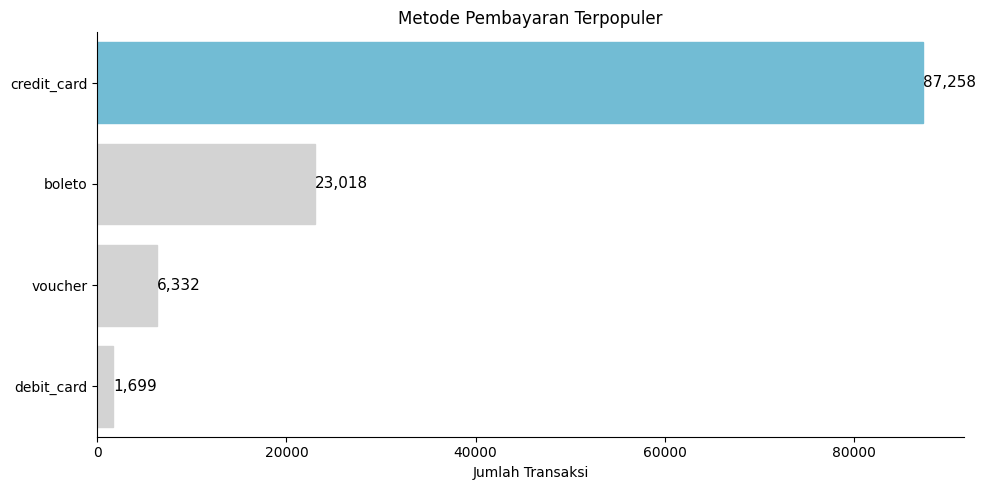

In [115]:
payment_counts = (
    merged_df.groupby("payment_type")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=payment_counts, x="count", y="payment_type")
for i, bar in enumerate(ax.patches):
    bar.set_color("#72BCD4" if i == 0 else "#D3D3D3")
    ax.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():,.0f}',
        va='center', fontsize=11)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Metode Pembayaran Terpopuler")
ax.set_xlabel("Jumlah Transaksi")
ax.set_ylabel(None)
plt.tight_layout()
plt.show()


In [89]:
payment_counts

,payment_type,count
1,credit_card,87258
0,boleto,23018
3,voucher,6332
2,debit_card,1699


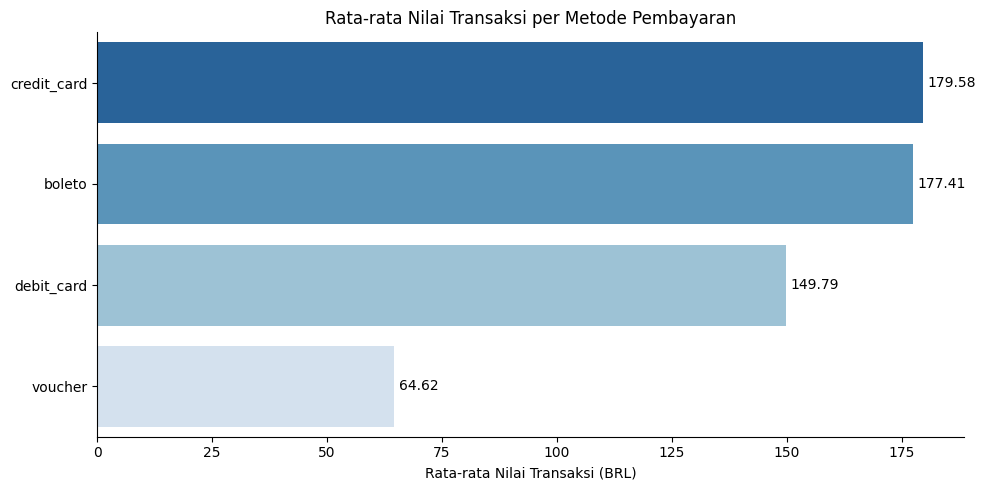

In [113]:
avg_payment = (
    merged_df.groupby("payment_type")["payment_value"]
    .mean()
    .reset_index()
    .sort_values("payment_value", ascending=False)
)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=avg_payment, x="payment_value", y="payment_type", palette=sns.color_palette("Blues", len(avg_payment))[::-1])
ax.set_title("Rata-rata Nilai Transaksi per Metode Pembayaran")
ax.set_xlabel("Rata-rata Nilai Transaksi (BRL)")
ax.set_ylabel(None)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():,.2f}',
        va='center', fontsize=10)

plt.tight_layout()
plt.show()


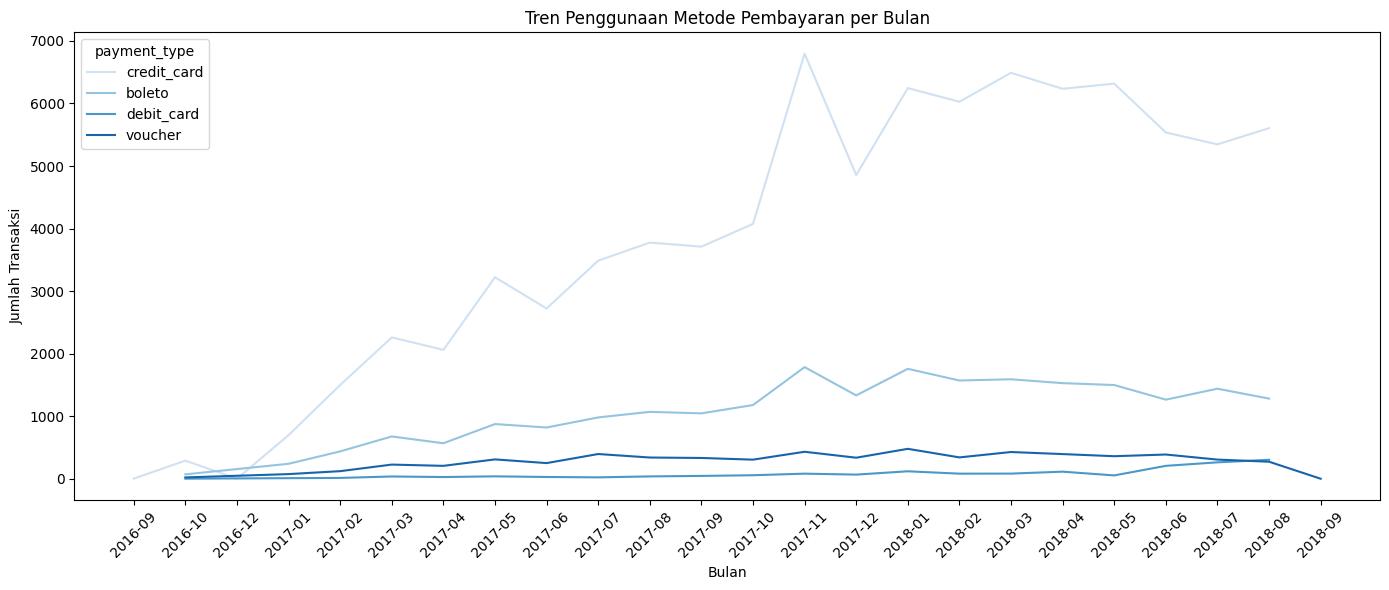

In [114]:
merged_df['purchase_month'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.to_period('M').astype(str)

monthly_payments = merged_df.groupby(['purchase_month', 'payment_type']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_payments, x='purchase_month', y='count', hue='payment_type', palette="Blues")
plt.title("Tren Penggunaan Metode Pembayaran per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Rata-rata Skor Review per Kategori Produk

<ipython-input-99-b0db1f03144f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_by_category.values, y=review_by_category.index, palette=colors)


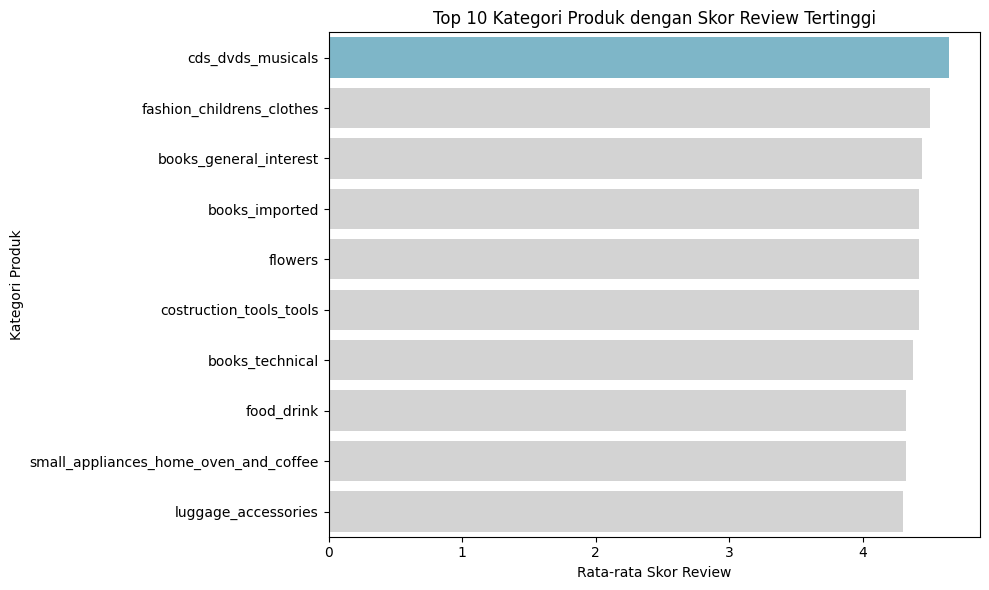

In [99]:
# Hitung rata-rata skor review per kategori
review_by_category = merged_df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10,6))
colors = ["#72BCD4" if i == 0 else "#D3D3D3" for i in range(len(review_by_category))]
sns.barplot(x=review_by_category.values, y=review_by_category.index, palette=colors)
plt.title("Top 10 Kategori Produk dengan Skor Review Tertinggi")
plt.xlabel("Rata-rata Skor Review")
plt.ylabel("Kategori Produk")
plt.tight_layout()
plt.show()


### Total Pendapatan per Kategori Produk

<ipython-input-100-e0c94ff67f11>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette=colors)


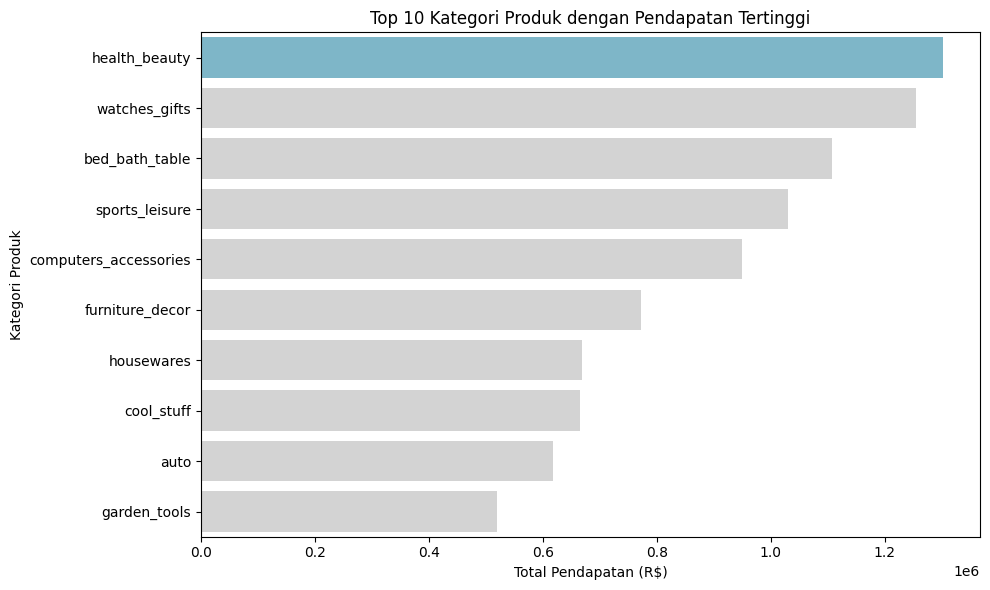

In [100]:
# Hitung total pendapatan (harga * jumlah item) per kategori
revenue_by_category = merged_df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
colors = ["#72BCD4" if i == 0 else "#D3D3D3" for i in range(len(revenue_by_category))]
sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette=colors)
plt.title("Top 10 Kategori Produk dengan Pendapatan Tertinggi")
plt.xlabel("Total Pendapatan (R$)")
plt.ylabel("Kategori Produk")
plt.tight_layout()
plt.show()


### Durasi Pengiriman Rata-rata per Negara Bagian

<ipython-input-101-d6d5a4c05aaa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_by_state.index, y=delivery_by_state.values, palette=colors)


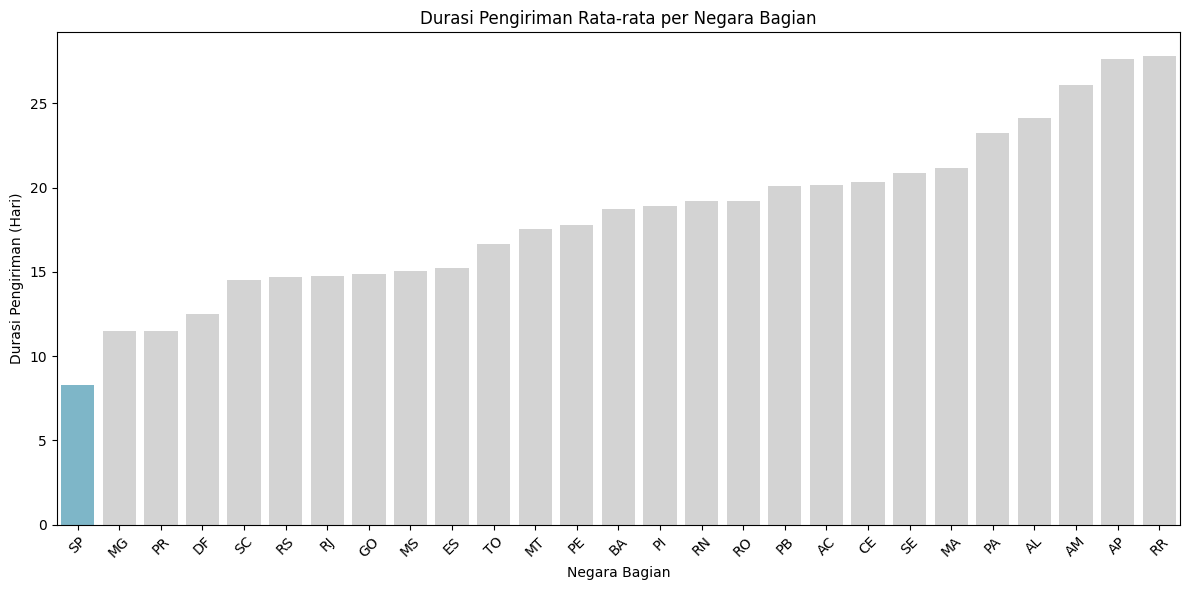

In [101]:
# Hitung durasi pengiriman dalam hari
merged_df['delivery_duration'] = (pd.to_datetime(merged_df['order_delivered_customer_date']) - pd.to_datetime(merged_df['order_purchase_timestamp'])).dt.days

# Filter data valid
delivery_state = merged_df.dropna(subset=['delivery_duration', 'customer_state'])
delivery_by_state = delivery_state.groupby('customer_state')['delivery_duration'].mean().sort_values()

plt.figure(figsize=(12,6))
colors = ["#72BCD4" if i == 0 else "#D3D3D3" for i in range(len(delivery_by_state))]
sns.barplot(x=delivery_by_state.index, y=delivery_by_state.values, palette=colors)
plt.title("Durasi Pengiriman Rata-rata per Negara Bagian")
plt.xlabel("Negara Bagian")
plt.ylabel("Durasi Pengiriman (Hari)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Produk dengan Tingkat Pengembalian Ulasan Rendah

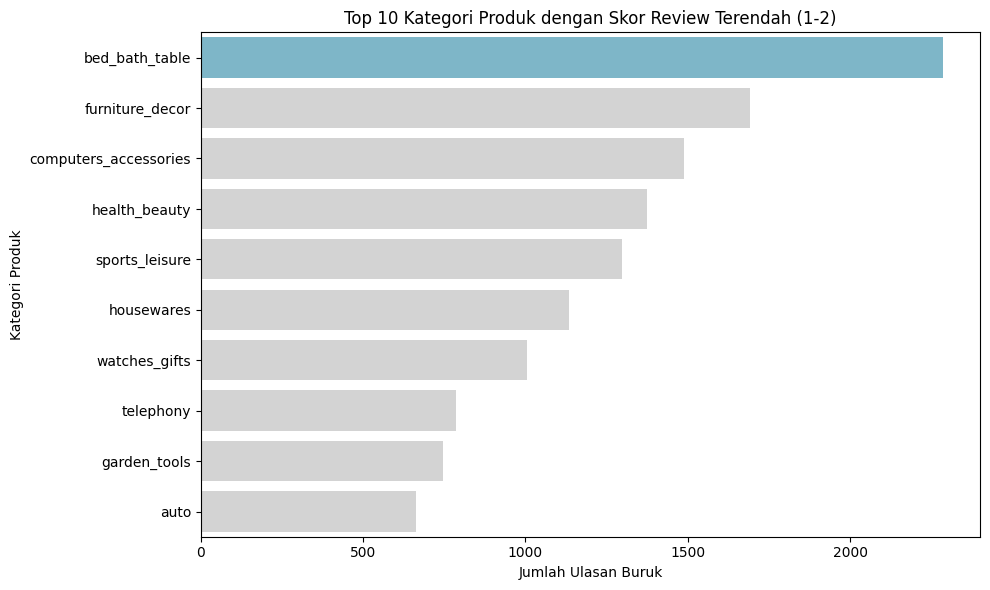

In [103]:
low_review_products = merged_df[merged_df['review_score'] <= 2]
low_review_counts = low_review_products['product_category_name_english'].value_counts().head(10)

plt.figure(figsize=(10,6))
colors = ["#72BCD4" if i == 0 else "#D3D3D3" for i in range(len(low_review_counts))]
sns.barplot(x=low_review_counts.values, y=low_review_counts.index, palette=colors)
plt.title("Top 10 Kategori Produk dengan Skor Review Terendah (1-2)")
plt.xlabel("Jumlah Ulasan Buruk")
plt.ylabel("Kategori Produk")
plt.tight_layout()
plt.show()

### Tren Skor Review dari Waktu ke Waktu

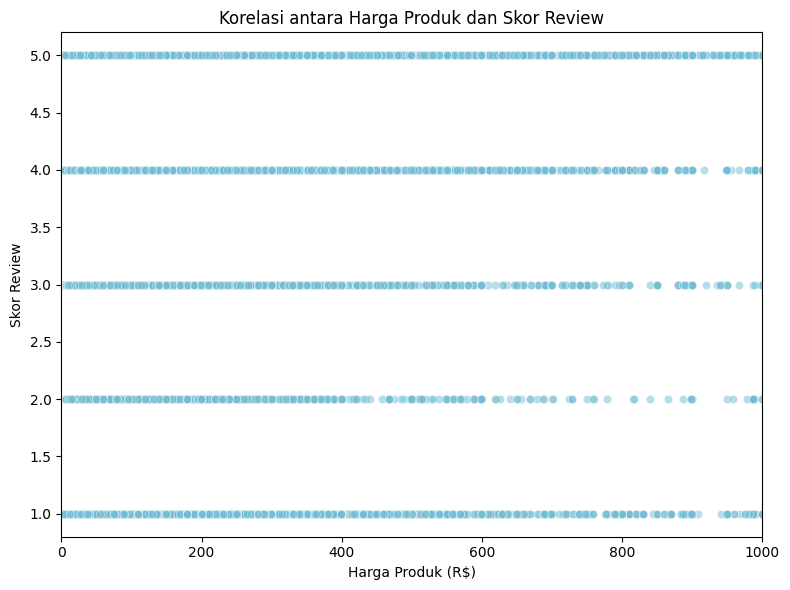

In [105]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='price', y='review_score', data=merged_df, alpha=0.5, color="#72BCD4")
plt.title("Korelasi antara Harga Produk dan Skor Review")
plt.xlabel("Harga Produk (R$)")
plt.ylabel("Skor Review")
plt.xlim(0, 1000)  # Batas sesuai data
plt.tight_layout()
plt.show()


## Analisis Lanjutan (Opsional)

In [90]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'has_comment_message', 'has_comment_title',
  

### RFM

In [91]:
print('waktu terbaru: ', merged_df['order_purchase_timestamp'].max())
print('waktu terlama: ',merged_df['order_purchase_timestamp'].min())

waktu terbaru:  2018-09-03 09:06:57
waktu terlama:  2016-09-04 21:15:19


In [92]:
#Y-M-D
now=dt.datetime(2018, 9, 4)
# now=dt.datetime(2018,10,20)

In [93]:
merged_df['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

In [94]:

now = merged_df['order_purchase_timestamp'].max()

# Hitung RFM
recency = (now - merged_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = merged_df.groupby('customer_id')['order_id'].count()
monetary = merged_df.groupby('customer_id')['price'].sum()

# Gabungkan jadi DataFrame
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})


In [95]:
rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
29063,4b7decb9b58e2569548b8b4c8e20e8d7,0,1,145.00
28259,496630b6740bcca28fce9ba50d8a26ef,4,1,24.90
88844,e60df9449653a95af4549bbfcb18a6eb,4,2,418.00
32387,54365416b7ef5599f54a6c7821d5d290,4,1,99.00
52937,898b7fee99c4e42170ab69ba59be0a8b,4,1,84.99
...,...,...,...,...
42878,6f989332712d3222b6571b1cf5b835ce,699,1,36.49
68438,b106b360fe2ef8849fbbd056f777b4d5,700,1,100.00
51900,86dc2ffce2dfff336de2f386a786e574,717,3,134.97
3329,08c5351a6aca1c1589a38f244edeee9d,728,2,72.89


In [96]:
rfm.describe()

,Recency,Frequency,Monetary
count,98666.000000,98666.000000,98666.000000
mean,244.815803,1.199096,144.666852
std,153.392909,0.752185,242.042981
min,0.000000,1.000000,0.850000
25%,121.000000,1.000000,47.700000
50%,226.000000,1.000000,89.700000
75%,355.000000,1.000000,155.000000
max,728.000000,63.000000,13440.000000


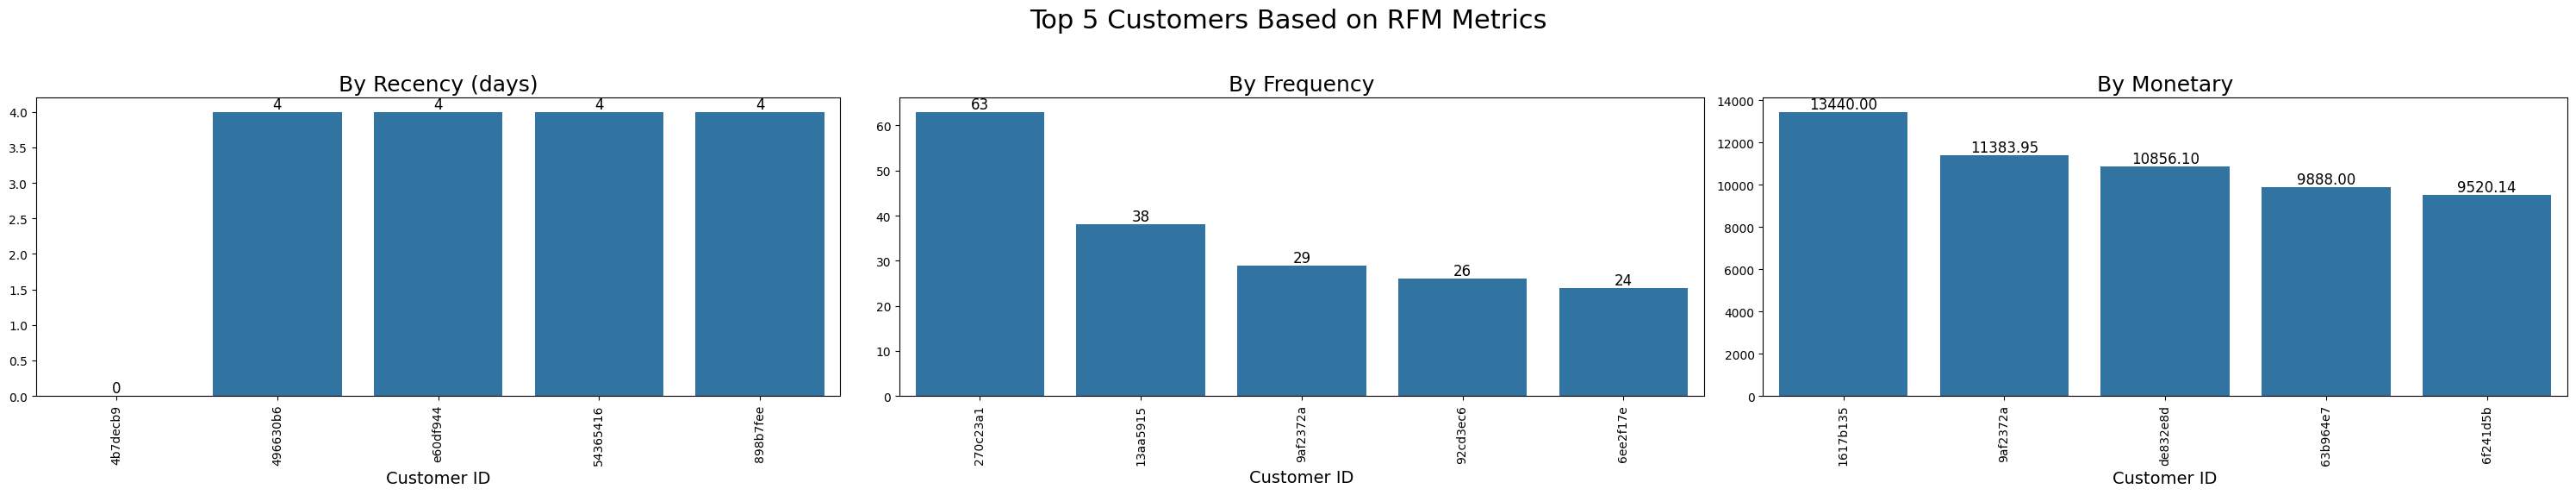

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
rfm['short_id'] = rfm['customer_id'].str[:8]  # hanya 8 karakter pertama

# RECENCY
top_recency = rfm.sort_values(by="Recency", ascending=True).head(5)
sns.barplot(y="Recency", x="short_id", data=top_recency, ax=ax[0])
ax[0].set_title("By Recency (days)", fontsize=18)
ax[0].set_xlabel("Customer ID", fontsize=14)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='x', rotation=90)

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=12, color='black')

# FREQUENCY
top_frequency = rfm.sort_values(by="Frequency", ascending=False).head(5)
sns.barplot(y="Frequency", x="short_id", data=top_frequency, ax=ax[1])
ax[1].set_title("By Frequency", fontsize=18)
ax[1].set_xlabel("Customer ID", fontsize=14)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', rotation=90)

for p in ax[1].patches:
    ax[1].annotate(f"{int(p.get_height())}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=12, color='black')

# MONETARY
top_monetary = rfm.sort_values(by="Monetary", ascending=False).head(5)
sns.barplot(y="Monetary", x="short_id", data=top_monetary, ax=ax[2])
ax[2].set_title("By Monetary", fontsize=18)
ax[2].set_xlabel("Customer ID", fontsize=14)
ax[2].set_ylabel(None)
ax[2].tick_params(axis='x', rotation=90)

for p in ax[2].patches:
    ax[2].annotate(f"{p.get_height():.2f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=12, color='black')

# Judul utama
plt.suptitle("Top 5 Customers Based on RFM Metrics", fontsize=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Insight**:
 1. Recency (Semakin kecil, semakin baru)
  - Pelanggan ini masih recently active.
  - Mereka bisa jadi target utama untuk email marketing, upsell, atau promo lanjutan karena mereka masih hangat.

2. Frequency (Jumlah order terbanyak)
  - Mereka loyal dan menunjukkan repeat behavior.
  - Bisa jadikan target loyalty program, subscription offer, atau bahkan brand ambassador.

3. Monetary (Total nilai pembelian tertinggi)
  - Mereka adalah high-value customers.
  - Prioritaskan mereka dalam personalized offers atau premium service.

In [98]:
#save data cleaned
merged_df.to_csv('all_data.csv', index=False)

## Conclusion

- Kategori produk apa saja yang paling banyak terjual dan paling sedikit terjual?
- Bagaimana data pembelian order setiap bulan secara menyeluruh?
- Apakah metode pembayaran yang paling banyak digunakan?

1. Kategori Produk Terlaris dan Terendah
 - Kategori Produk Terlaris:

    - Bed, Bath & Table dengan 11.988 unit terjual, menduduki peringkat pertama sebagai produk yang paling banyak terjual.

    - Health & Beauty dan Sports & Leisure juga menunjukkan angka penjualan yang tinggi dengan masing-masing 10.032 dan 9.004 unit terjual.

  - Kategori Produk Tersedikit:

    - Security and Services adalah kategori dengan penjualan terendah, hanya 2 unit terjual.

    - Arts and Craftsmanship juga sangat rendah, hanya mencatatkan 24 unit terjual, diikuti dengan kategori Fashion Children's Clothes yang terjual 8 unit.

  **Kesimpulan**: Produk dengan kategori yang lebih umum dan fungsional, seperti bed_bath_table dan health_beauty, menunjukkan performa penjualan yang lebih tinggi, sementara kategori yang lebih spesifik atau lebih niche, seperti arts_and_craftsmanship dan security_and_services, menunjukkan penjualan yang sangat rendah.

2. Data Pembelian Order Setiap Bulan
Dari data pembelian setiap bulan, terlihat adanya fluktuasi yang signifikan dalam jumlah order:

  - Puncak Pembelian: Pembelian tertinggi tercatat pada bulan November 2017, dengan 9.096 order. Puncak ini menunjukkan periode tinggi untuk pembelian, mungkin karena promosi atau event khusus pada bulan tersebut.

  - Penurunan Pembelian: Pembelian terendah tercatat pada September 2016 dengan hanya 6 order, yang menunjukkan bahwa data dimulai pada periode rendah dan kemudian meningkat drastis seiring waktu.

  **Kesimpulan**: Ada tren kenaikan volume pembelian yang signifikan mulai 2017 hingga 2018, dengan puncak tertinggi pada akhir 2017, yang bisa menunjukkan pengaruh dari kampanye musiman atau acara tertentu.

3. Metode Pembayaran Paling Populer
Metode pembayaran yang paling banyak digunakan adalah:

  - Credit Card yang digunakan oleh 87.258 pelanggan, mendominasi sebagai metode pembayaran utama.

  - Boleto menjadi pilihan kedua dengan 23.018 transaksi.

  - Voucher dan Debit Card tercatat dengan jumlah masing-masing 6.332 dan 1.699.

  **Kesimpulan**: Credit card adalah metode pembayaran yang paling disukai oleh pelanggan, dengan Boleto menjadi alternatif yang cukup populer di pasar. Debit card dan voucher memiliki angka transaksi yang jauh lebih rendah, yang menunjukkan bahwa mereka mungkin lebih jarang digunakan atau dipilih berdasarkan kebutuhan spesifik.